In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
positive_negative_texts.head(60)

,Text,Paul,Label
0,we love you,1,Positive
1,they love us,1,Positive
2,you are good,1,Positive
3,he is good,1,Positive
4,they love mary,1,Positive
5,we hate you,0,Negative
6,they hate us,0,Negative
7,you are bad,0,Negative
8,he is bad,0,Negative
9,we hate mary,0,Negative


In [4]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(positive_negative_texts, positive_negative_texts["Label"]):
    strat_train_set = positive_negative_texts.reindex(train_index)
    strat_test_set  = positive_negative_texts.reindex(test_index)

In [5]:
vectorizer = CountVectorizer()
training_labels  = strat_train_set["Label"].tolist()
training_vectors = vectorizer.fit_transform(strat_train_set["Text"].tolist())
testing_vectors  = vectorizer.transform(strat_test_set["Text"].tolist())

In [6]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(training_vectors, training_labels)
predictions = classifier.predict(testing_vectors)
print(predictions)

['Negative' 'Positive' 'Positive']


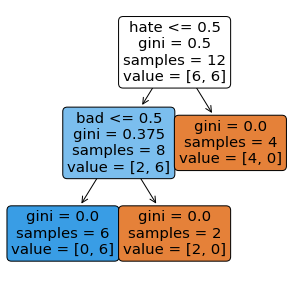

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
tree.plot_tree(classifier,feature_names = vectorizer.get_feature_names(), rounded = True, filled = True) 
fig.savefig('tree.png')